## Importar las bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns

##  Cargar los datos

In [ ]:
data = pd.read_csv('USA_Housing.csv')
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [ ]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


##  Paso 1: División del Conjunto de Datos

* Objetivo: Dividir el conjunto de datos en conjuntos de entrenamiento y prueba.

**Instrucciones:**

- Utilizarán train_test_split de sklearn para dividir los datos.
- Establecerán una proporción de, por ejemplo, 80% para entrenamiento y 20% para prueba.
Se asegurarán de incluir la variable objetivo.
- Utilizarán validación cruzada (cross_val_score de sklearn) para una evaluación más robusta del modelo. Explicarán cómo la validación cruzada puede ayudar a evaluar la estabilidad y la generalización del modelo.

In [ ]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
          'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

#####  Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)

In [ ]:
# Se divide el conjunto de prueba en 80% entrenamiento y 20% pueba y utiliza tra train_test_split para dividir los datos.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Crear una instancia del modelo
model = LinearRegression()

# Realizar validación cruzada con 5 folds
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Imprimir los puntajes de cada fold
print("Puntajes de validación cruzada:", cv_scores)

# Imprimir el puntaje promedio de validación cruzada
print("Puntaje promedio de validación cruzada:", cv_scores.mean())


Puntajes de validación cruzada: [0.9133983  0.90998609 0.91931737 0.92055795 0.92380625]
Puntaje promedio de validación cruzada: 0.9174131909728725


**Interpretación general:**

- **Consistencia**: Los puntajes individuales son bastante cercanos entre sí, lo que indica que el modelo es consistente en su rendimiento. Esto significa que no es muy sensible a las particiones de datos específicas.

- **Rendimiento del modelo:** Un promedio de R² de 0.9174 sugiere que el modelo de regresión lineal es eficaz para explicar la variabilidad de los datos, lo que generalmente es un buen indicador de su capacidad predictiva.

## Paso 2: Preprocesamiento de Datos

**Objetivo:** Estandarizar o normalizar las características.

**Instrucciones:**
- Usarán StandardScaler de sklearn para estandarizar los datos.
- Aplicarán el escalador solo a los datos de entrenamiento y luego transformarán los datos de prueba.

In [ ]:
# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar el scaler a los datos de entrenamiento y transformarlos
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba utilizando el scaler ajustado con los datos de entrenamiento
X_test_scaled = scaler.transform(X_test)

**Paso 3: Implementación de Múltiples Modelos**

**Objetivo:** Entrenar varios modelos de Machine Learning y compararlos.

**Instrucciones:**

- Seleccionarán al menos tres modelos diferentes, por ejemplo: Regresión Logística, Árbol de Decisión y SVM.
- Entrenarán cada modelo usando los datos de entrenamiento.
- Realizarán predicciones con los datos de prueba.

**Modelo de Regresión lineal**

In [ ]:
# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_entrenamiento, y_entrenamiento)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_prueba)

# Evaluar el modelo con métricas
mse = mean_squared_error(y_prueba, y_pred)
mae = mean_absolute_error(y_prueba, y_pred)
r2 = r2_score(y_prueba, y_pred)

# Imprimir los resultados
print("MSE::", mse)
print("MAE:", mae)
print("R²:", r2)


MSE:: 10089009300.894518
MAE: 80879.0972348982
R²: 0.9179971706834289


AUC-ROC: 0.97092


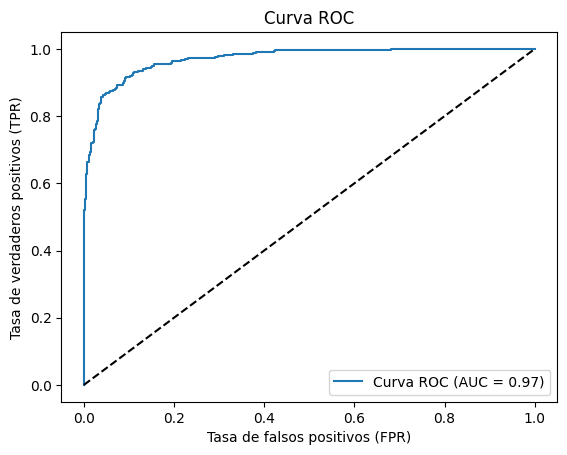

In [ ]:
# AUC-ROC.

threshold = np.median(y_test)
y_test_binary = np.where(y_test >= threshold, 1, 0)


# Calculate the AUC-ROC
auc = roc_auc_score(y_test_binary, y_pred)
print("AUC-ROC:", auc)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

**Interpretación curva ROC :**

El modelo es muy bueno para clasificar correctamente los datos. Un AUC de 0.97 sugiere que el modelo predice correctamente el 97% de las veces al comparar pares de puntos aleatorios (uno positivo y uno negativo).
La curva se mantiene cerca de la esquina superior izquierda, lo que indica que la tasa de verdaderos positivos es alta y la tasa de falsos positivos es baja en la mayoría de los puntos de umbral.
En resumen, el modelo tiene un excelente desempeño, siendo capaz de distinguir de manera efectiva entre clases positivas y negativas.

##  Árbol de Decisión

In [ ]:
modelo_arbol = DecisionTreeRegressor(random_state=42)
modelo_arbol.fit(X_entrenamiento, y_entrenamiento)

# Predicciones del modelo
y_pred_arbol = modelo_arbol.predict(X_prueba)

# Evaluación del modelo
mse_arbol = mean_squared_error(y_prueba, y_pred_arbol)
print("MSE:", mse_arbol)
mae_arbol = mean_absolute_error(y_prueba, y_pred_arbol)
print("MAE:", mae_arbol)
r2_arbol = r2_score(y_prueba, y_pred_arbol)
print("R²:", r2_arbol)

MSE: 31568012111.933002
MAE: 140823.9622961814
R²: 0.7434171947042635


## SVM (Máquina de Soporte Vectorial)

In [ ]:
modelo_svm = SVR(kernel='linear')
modelo_svm.fit(X_entrenamiento, y_entrenamiento)

# Predicciones del modelo
y_pred_svm = modelo_svm.predict(X_prueba)

# Evaluación del modelo
mse_svm = mean_squared_error(y_prueba, y_pred_svm)
print("MSE:", mse_svm)
mae_svm = mean_absolute_error(y_prueba, y_pred_svm)
print("MAE:", mae_svm)
r2_svm = r2_score(y_prueba, y_pred_svm)
print("R²:", r2_svm)

MSE: 51958109471.10602
MAE: 182964.91874721312
R²: 0.5776877733482653



| Modelo                     | MSE              | MAE              | R²             |
|----------------------------|------------------|------------------|----------------|
| **Regresión Lineal**        | 10,089,009,300.89| 80,879.10        | 0.918          |
| **Árbol de Decisión**       | 31,568,012,111.93| 140,823.96       |  0.743  |
| **SVM (Máquina de Soporte Vectorial)** | 51,958,109,471.11 | 182,964.92      | 0.578          |



 ## 8: Interpretación de los Resultados:

**Interpretación de los resultados:**

**Regresión Lineal:** Es el modelo que presenta el mejor rendimiento, con un MSE más bajo y un valor de R² cercano a 0.918, lo que indica que explica bien la variabilidad de los datos.

**Árbol de Decisión:** Tiene un MSE más alto que la regresión lineal, lo que indica que comete más errores. No se proporciona el valor de R², pero su MAE es mayor, lo que implica una peor precisión.

**SVM (Máquina de Soporte Vectorial):** Es el modelo que rinde peor con el MSE y el MAE más altos. El valor de R² de 0.578 también sugiere que este modelo no es tan efectivo como la regresión lineal para explicar la variabilidad de los datos.

**Paso 6: Documentación y Presentación**

**Objetivo:** Documentar el proceso y los resultados.

**Instrucciones:**

- Prepararán un video explicando el paso a paso del proceso, destacando los puntos clave y las lecciones aprendidas.
- El video debe explicar claramente cada paso del proceso, desde la división de los datos hasta la interpretación de los resultados, haciendo especialmente si el desarrollo del modelo soluciona el problema macro por el cual fue creado.